In [1]:
import keras
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

2024-11-28 20:48:16.361656: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-28 20:48:16.365176: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-28 20:48:16.376341: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732807096.395284   26083 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732807096.400885   26083 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
from keras.datasets import imdb

In [3]:
(train_imdb, train_imdb_labels),(test_imdb, test_imdb_labels) = imdb.load_data(num_words=10000)

In [4]:
print(train_imdb.shape)
print(test_imdb.shape)

(25000,)
(25000,)


In [5]:
max([max(token) for token in train_imdb])

9999

We can see that since we loaded the top 10000 most occuring words the max token index is 9999.

In [6]:
# let us check length of tokens in the first 5 rows of the training dataset
for i in range(5):
    print(f"Train[{i}] token length: {len(train_imdb[i])}")

Train[0] token length: 218
Train[1] token length: 189
Train[2] token length: 141
Train[3] token length: 550
Train[4] token length: 147


We can see that there are variable length of the token indices for each row since the review text length will be different mostly.

### Can we get the review text from tokens??

In [10]:
# Get the word index which is a word to index mapping dict
word_index = imdb.get_word_index()
# Get the reversed dictionary
reversed_word_index = dict([(value, key) for key, value in word_index.items()])
decoded_string = " ".join([reversed_word_index.get(i-3, "?") for i in train_imdb[0]])
decoded_string

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Vectorize the training dataset

In [9]:
train_imdb_vectorized = np.zeros((train_imdb.shape[0], 10000))
test_imdb_vectorized = np.zeros((test_imdb.shape[0], 10000))

In [10]:
for idx, row in enumerate(train_imdb[:5]):
    train_imdb_vectorized[idx, row] = 1

train_imdb_vectorized[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
len(train_imdb[0])

218

In [12]:
sum(train_imdb_vectorized[0])

np.float64(120.0)

Since we are looking at text tokens of which some tokens can be repeated thus sum of OHE vector is less than length of the training instance list 

In [13]:
# Let us write a function
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for  i, sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

x_train = vectorize_sequences(train_imdb)
x_test = vectorize_sequences(test_imdb)

In [14]:
x_train.shape

(25000, 10000)

In [15]:
x_test.shape

(25000, 10000)

In [16]:
y_train = np.asarray(train_imdb_labels).astype("float32")
y_test = np.asarray(test_imdb_labels).astype("float32")

### Lets build our first simple model

In [18]:
model_1 = models.Sequential()

In [19]:
model_1.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model_1.add(layers.Dense(16, activation="relu"))
model_1.add(layers.Dense(1, activation="sigmoid"))

/mnt/hdd/StudySpace/DL_Chollet/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-27 10:52:23.523750: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [21]:
# Create a validation set to check the accuracy
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
model_1.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics= ["accuracy"])
history = model_1.fit(x=partial_x_train,y=partial_y_train,batch_size=512,epochs=20,validation_data=(x_val, y_val))

Epoch 1/20


2024-11-27 11:04:37.668171: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6642 - loss: 0.6380

2024-11-27 11:04:40.207500: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 400000000 exceeds 10% of free system memory.


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.6736 - loss: 0.6313 - val_accuracy: 0.8478 - val_loss: 0.4412
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8861 - loss: 0.3803 - val_accuracy: 0.8797 - val_loss: 0.3341
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9119 - loss: 0.2739 - val_accuracy: 0.8779 - val_loss: 0.3113
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9323 - loss: 0.2170 - val_accuracy: 0.8901 - val_loss: 0.2752
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9454 - loss: 0.1742 - val_accuracy: 0.8884 - val_loss: 0.2804
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9504 - loss: 0.1534 - val_accuracy: 0.8851 - val_loss: 0.2869
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9593 - loss: 0.1342 - val_accuracy: 0.8874 - val_loss: 0.2842
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9697 - loss: 0.1123 - val_accuracy: 0.8850 - val_loss: 0.

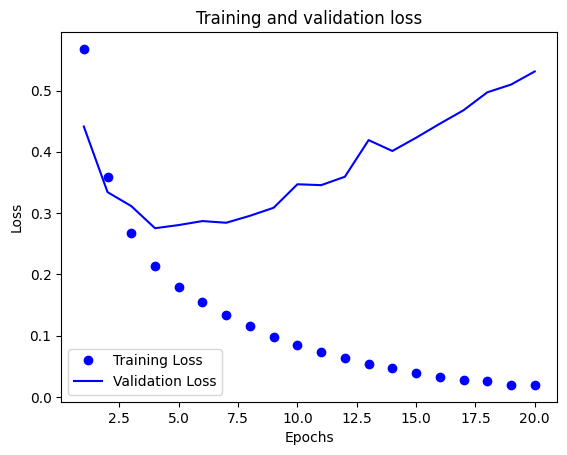

In [28]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, "bo", label = "Training Loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [29]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

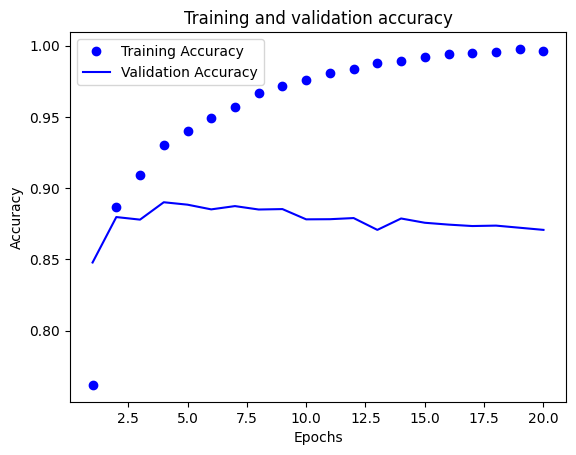

In [32]:
plt.plot(epochs, acc_values, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc_values, "b", label = "Validation Accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


We can see there is a overfitting in this network and training model for the 4 epochs is best for the accuracy

In [39]:
# Training on whole training dataset from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics= ["accuracy"])
model.fit(x=x_train, y=y_train, batch_size=512, epochs=4)
model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7143 - loss: 0.5653
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9069 - loss: 0.2791
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9275 - loss: 0.2110
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9383 - loss: 0.1810
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8840 - loss: 0.2885


[0.2884281575679779, 0.8853200078010559]

In [40]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.20196168],
       [0.9983403 ],
       [0.53044933],
       ...,
       [0.08795783],
       [0.07803646],
       [0.61249226]], dtype=float32)